In [21]:
# Importação de bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [22]:
def show_custom_plot(ax, x_label, y_label, title, fig_size=(10, 6), rotation=(0, 0)):
    """
    Mostra um gráfico personalizado utilizando o pacote Seaborn.

    Args:
        ax (matplotlib.axes.Axes): O objeto de eixos do gráfico.
        x_label (str): O rótulo do eixo x.
        y_label (str): O rótulo do eixo y.
        title (str): O título do gráfico.
        fig_size (tuple, optional): O tamanho da figura (largura, altura). Padrão é (10, 6).
        rotation (tuple, optional): A rotação dos rótulos do eixo x e y, respectivamente. Padrão é (0, 0).
    """

    # Definir o estilo do gráfico
    sns.set_theme(style="darkgrid", rc={"figure.figsize": fig_size})

    # Definir as cores
    background_color = "#282c34"  # Fundo cinza escuro
    text_color = "#abb2bf"  # Cor do texto (cinza claro)
    axis_color = "#61afef"  # Cor dos eixos (azul claro)
    grid_color = "#3e4451"  # Cor das linhas da grade (cinza escuro)
    bar_color = "#6272a4"  # Cor das barras (azul/roxo escuro pastel)
    bar_edge_color = "#abb2bf"  # Cor das bordas das barras (cinza claro)

    # Ajustar cores do gráfico
    ax.set_facecolor(background_color)  # Fundo do gráfico
    ax.figure.set_facecolor(background_color)  # Fundo da figura

    # Ajustar cores do texto
    ax.title.set_color(text_color)
    ax.xaxis.label.set_color(text_color)
    ax.yaxis.label.set_color(text_color)
    ax.tick_params(axis="x", colors=text_color, rotation=rotation[0], labelsize=8)
    ax.tick_params(axis="y", colors=text_color, rotation=rotation[1], labelsize=8)

    # Ajustar cores das linhas e bordas
    ax.spines["top"].set_color(grid_color)
    ax.spines["right"].set_color(grid_color)
    ax.spines["bottom"].set_color(grid_color)
    ax.spines["left"].set_color(grid_color)

    # Ajustar cores das barras
    for patch in ax.patches:
        patch.set_facecolor(bar_color)
        patch.set_edgecolor(bar_edge_color)

    # Ajustar a grade para ser exibida apenas no eixo x
    ax.grid(axis="x", color=grid_color)

    # Definir título e rótulos dos eixos
    ax.set_title(title, fontsize=16, color=text_color)
    ax.set_xlabel(x_label, fontsize=12, color=text_color)
    ax.set_ylabel(y_label, fontsize=12, color=text_color)

    plt.show()

In [23]:
# Ainda não implementado
def switch_flag(flag):
    if flag is False:
        flag = True
        return True

In [24]:
def convert_values(data_frame):
    """
    Converts the values in the 'blogger_thematics' column of the given DataFrame.

    Args:
        data_frame (pandas.DataFrame): The DataFrame containing the 'blogger_thematics' column.

    Returns:
        pandas.DataFrame: The DataFrame with the converted values in the 'blogger_thematics' column.
    """
    data_frame["blogger_thematics"] = data_frame["blogger_thematics"].apply(
        lambda x: (
            [-1] if x is None else [-1 if val == None else val - 1000 for val in x]
        )
    )

    return data_frame


def concatenate_values(data_frame):
    """
    Applies transformations to the 'blogger_thematics' column of the given DataFrame.

    Args:
        data_frame (pandas.DataFrame): The DataFrame containing the 'blogger_thematics' column.

    Returns:
        pandas.DataFrame: The DataFrame with the transformed 'blogger_thematics' column.
    """
    data_frame["blogger_thematics"] = data_frame["blogger_thematics"].apply(
        lambda x: "".join(
            sorted([f"{val:02d}" if val != -1 else str(val) for val in x])
        )
    )
    data_frame["blogger_thematics"] = data_frame["blogger_thematics"].apply(
        lambda x: f"{int(x):012d}" if x != "-1" else x
    )
    return data_frame


def reverse_concatenate_values(value):
    """
    Reverte a justaposição de categorias em strings de 12 caracteres.

    Args:
        value (int): O valor contendo categorias justapostas.

    Returns:
        list: Lista de categorias revertidas.
    """
    if value == -1:
        return [-1]

    # Convertendo o valor para string com 12 caracteres
    value_str = f"{value:012d}"

    # Separar a string em pares de caracteres
    pairs = [value_str[i : i + 2] for i in range(0, len(value_str), 2)]

    # Converter os pares de caracteres de volta para valores numéricos
    categories = [int(pair) for pair in pairs]

    return categories


# Função de mapeamento para categorias abrangentes
def map_to_abbr_category(value, category_mapping):
    """
    Maps a value to its corresponding abbreviation category using a given category mapping.

    Parameters:
    value (any): The value to be mapped.
    category_mapping (dict): A dictionary containing the mapping of values to abbreviation categories.

    Returns:
    str: The abbreviation category corresponding to the given value. If the value is not found in the mapping,
        'Desconhecida' is returned as the default category.

    """
    return category_mapping.get(value, "Desconhecida")


instagram_brasil_df = pd.read_json("df_Instagram_Brasil.json")
display(instagram_brasil_df.head())

converted_df = convert_values(instagram_brasil_df.copy())
transformed_df = concatenate_values(converted_df.copy())
display(transformed_df)

transformed_df.to_json("Instagram_Brazil_rebuild.json", index=False)

,fullname,is_verified,subscribers_count,engagement_avg,authentic_engagement,blogger_thematics,audience_geo_country_1_prc
2pac,Tupac Shakur,True,9022315,76549,55351,"[1027, 1041, 1036, 1032]",28.16
30sertanejo,É A 30! 🤠🔥🍻,False,1380395,501440,390463,"[1017, 1036, 1027]",77.15
333cyj333,YOUNGJAE,True,6436397,183496,146678,[1027],17.33
3gerardpique,Gerard Piqué,True,22298880,228250,171242,[1013],16.43
9gag,9GAG: Go Fun The World,True,56807517,42785,35513,[1036],9.68


,fullname,is_verified,subscribers_count,engagement_avg,authentic_engagement,blogger_thematics,audience_geo_country_1_prc
2pac,Tupac Shakur,True,9022315,76549,55351,000027323641,28.16
30sertanejo,É A 30! 🤠🔥🍻,False,1380395,501440,390463,000000172736,77.15
333cyj333,YOUNGJAE,True,6436397,183496,146678,000000000027,17.33
3gerardpique,Gerard Piqué,True,22298880,228250,171242,000000000013,16.43
9gag,9GAG: Go Fun The World,True,56807517,42785,35513,000000000036,9.68
...,...,...,...,...,...,...,...
zuck,Mark Zuckerberg,True,13966850,191959,144859,000000000005,16.55
_antoniagentry_,Toni,True,3706237,230467,130056,000000000032,22.68
_mariahwasa,HWASA,True,8964237,472777,381839,000000000027,12.28
_picolo,Gabriel Picolo,True,3578484,600578,492803,000000000216,25.34


In [25]:
# Importação dos dados
instagram_brasil_rebuild_df = pd.read_json("Instagram_Brazil_rebuild.json")
global flag_ems_ems
ms_ems = False
df_valido = pd.read_json("df_final_valido.json")
df_faltante = pd.read_json("df_final_faltante.json")


# Exibir dados


print("df__valido:")
display(df_valido.head())


print("df__faltante:")
display(df_faltante.head())

df__valido:


,Categoria (Português),Categoria (Inglês),Categoria Abrangente
0,Acessórios e Jóias,Accessories & Jewellery,Beleza e Moda
1,Álcool,Alcohol,Comida e Bebida
2,Arte/Artistas,Art/Artists,Arte/Artistas
4,Literatura e Jornalismo,Literature & Journalism,Literatura e Jornalismo
5,Negócios e Carreiras,Business & Careers,Negócios e Carreiras


df__faltante:


,Categoria (Português),Categoria (Inglês),ID,Categoria Abrangente
1,Maquiagem,Makeup,-1,Beleza e Moda
2,Cuidados com a pele,Skincare,-1,Beleza e Moda
3,Cuidados com o cabelo,Haircare,-1,Beleza e Moda
4,Cuidados com as unhas,Nail Care,-1,Beleza e Moda
6,Cosplay,Cosplay,-1,Outros


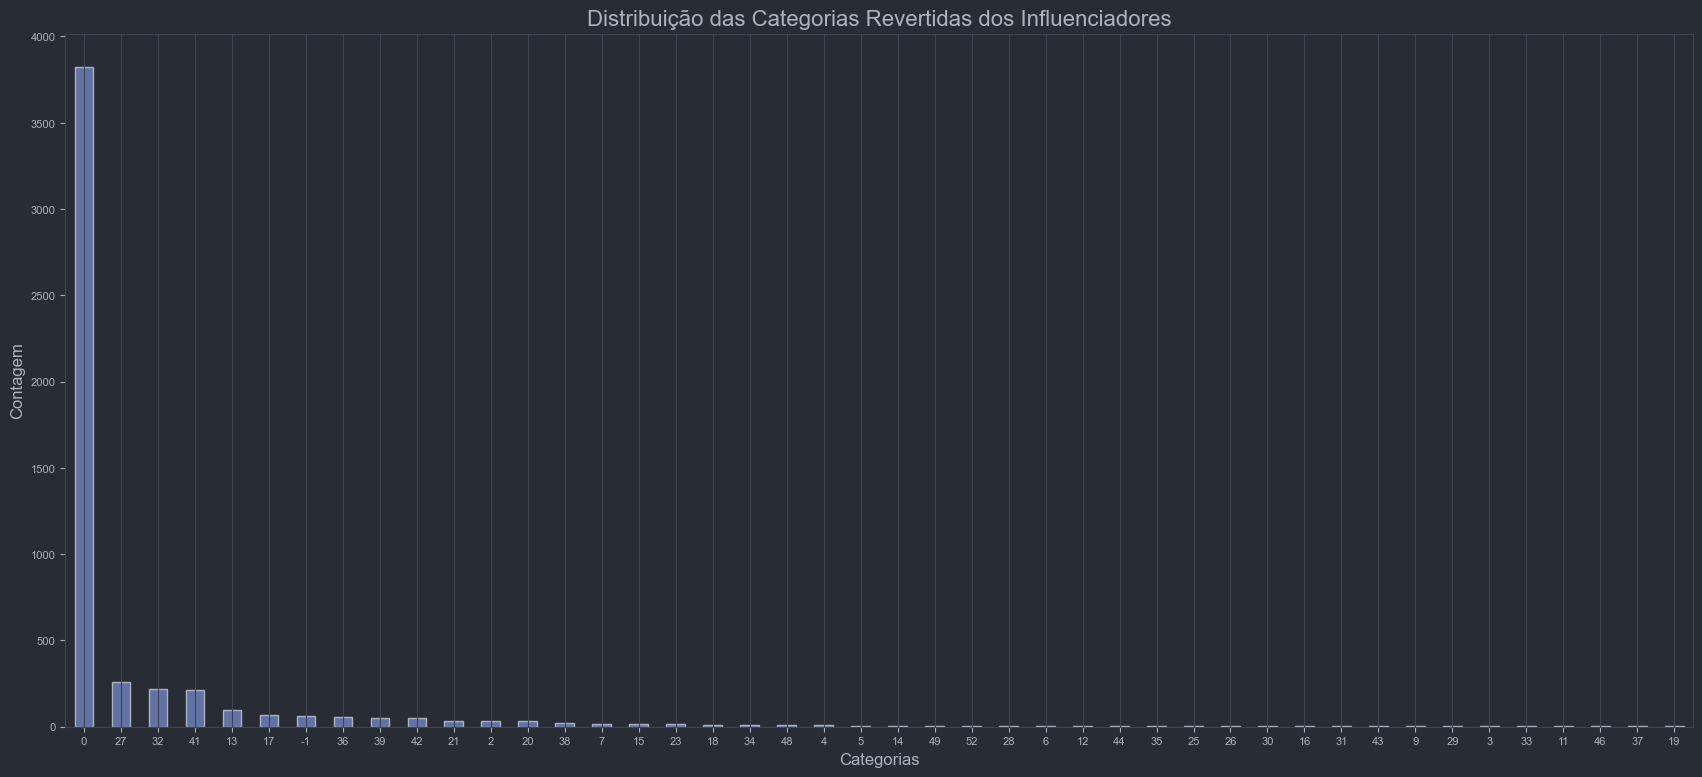

In [26]:
# flag ms_ems
# Calculando a média de seguidores e engajamento médio


# Aplicando a função ajustada ao dataframe
instagram_brasil_rebuild_df["reverted_thematics"] = instagram_brasil_rebuild_df[
    "blogger_thematics"
].apply(reverse_concatenate_values)

# Expandindo as categorias revertidas em múltiplas linhas para análise de frequência
all_thematics = instagram_brasil_rebuild_df.explode("reverted_thematics")[
    "reverted_thematics"
]

# Contando a frequência de cada categoria
category_counts_reverted = all_thematics.value_counts()

switch_flag(ms_ems)

# Plotar o gráfico de distribuição das temáticas dos influenciadores com a função customizada
# Plotando o gráfico de distribuição das temáticas revertidas
fig, ax = plt.subplots(figsize=(21, 9))
category_counts_reverted.plot(kind="bar", ax=ax)
show_custom_plot(
    ax,
    "Categorias",
    "Contagem",
    "Distribuição das Categorias Revertidas dos Influenciadores",
)

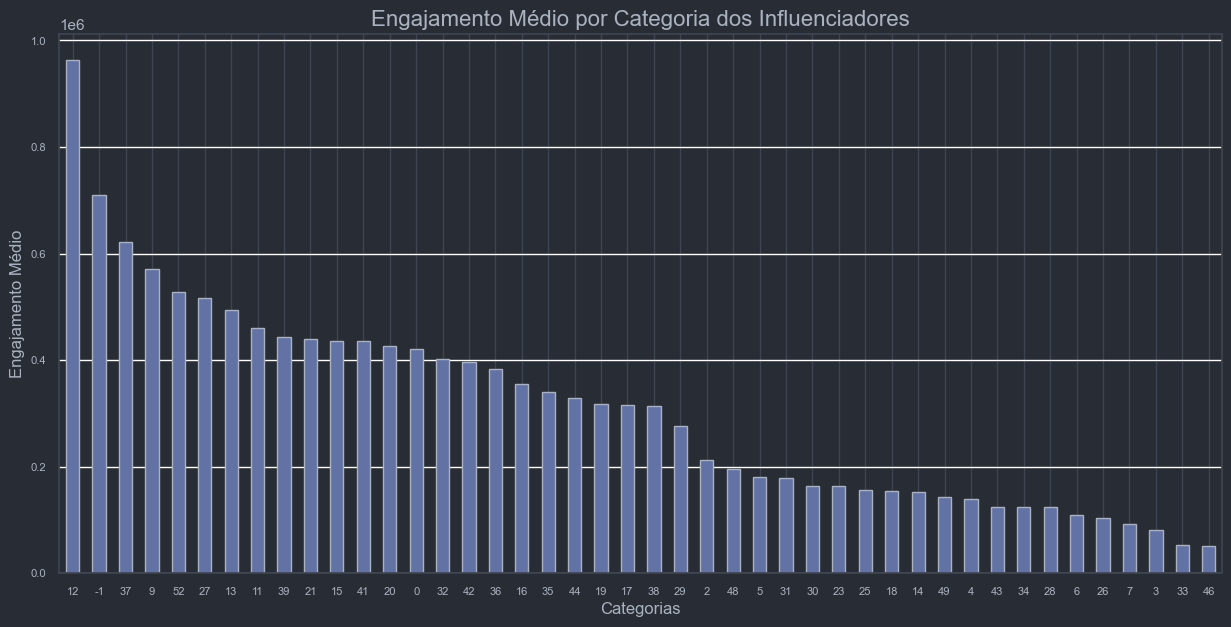

In [27]:
# Adicionando a lista de categorias revertidas ao dataframe original
instagram_brasil_rebuild_df["categories"] = instagram_brasil_rebuild_df[
    "reverted_thematics"
]

# Explodindo as categorias para calcular o engajamento médio por categoria
exploded_df = instagram_brasil_rebuild_df.explode("categories")

# Calculando o engajamento médio por categoria
engagement_by_category = (
    exploded_df.groupby("categories")["engagement_avg"]
    .mean()
    .sort_values(ascending=False)
)

# Plotando o gráfico de engajamento médio por categoria
fig, ax = plt.subplots(figsize=(15, 7))
engagement_by_category.plot(kind="bar", ax=ax)
show_custom_plot(
    ax,
    "Categorias",
    "Engajamento Médio",
    "Engajamento Médio por Categoria dos Influenciadores",
)

In [28]:
# Criar dicionário de mapeamento de categorias específicas para abrangentes
category_mapping_valido = df_valido.set_index("Categoria (Português)")[
    "Categoria Abrangente"
].to_dict()
category_mapping_faltante = df_faltante.set_index("Categoria (Português)")[
    "Categoria Abrangente"
].to_dict()

# Unificar os dicionários de mapeamento
category_mapping = {**category_mapping_valido, **category_mapping_faltante}

In [29]:
# Aplicar mapeamento ao dataframe expandido
exploded_df["categories_abbr"] = exploded_df["categories"].apply(
    lambda x: map_to_abbr_category(x, category_mapping)
)

# Verificar se há categorias não mapeadas
unmapped_categories = exploded_df[exploded_df["categories_abbr"] == "Desconhecida"][
    "categories"
].unique()

# Exibir categorias não mapeadas
unmapped_categories

array([0, 27, 32, 36, 41, 17, 13, 7, 28, 20, 5, 38, 2, 35, 39, -1, 42, 34,
       3, 18, 21, 15, 23, 6, 9, 4, 26, 31, 25, 48, 44, 12, 33, 43, 49, 11,
       14, 52, 46, 30, 16, 37, 29, 19], dtype=object)

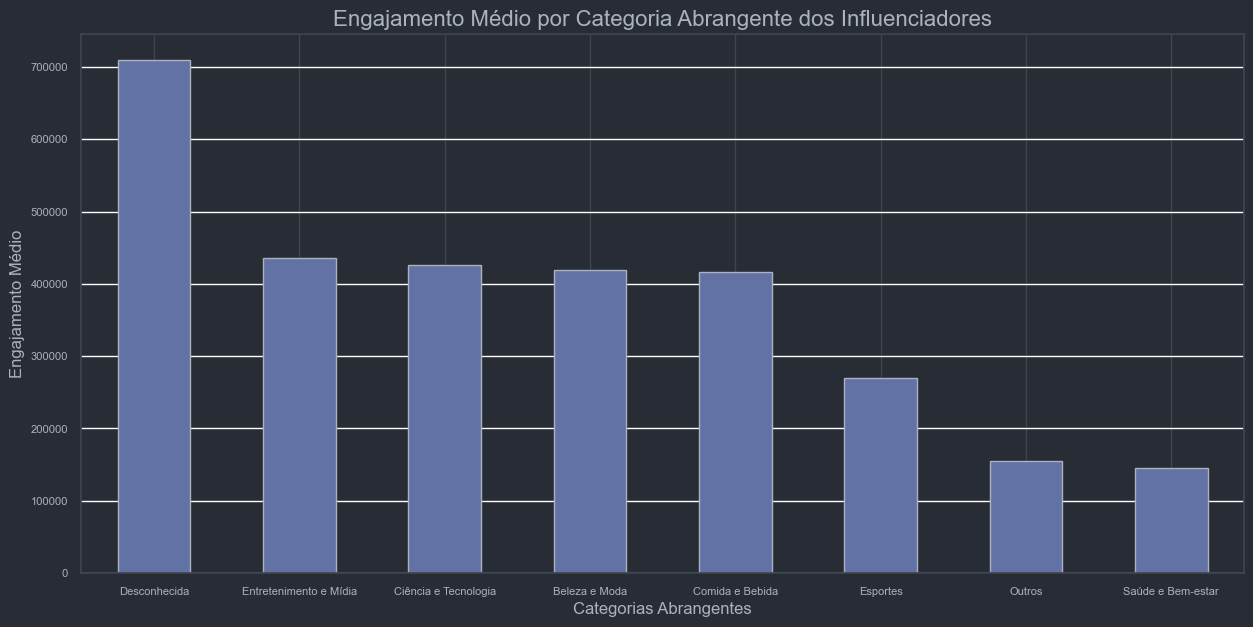

In [30]:
# Criar dicionário de mapeamento de IDs para nomes de categorias
id_to_category_valido = {
    i: cat for i, cat in enumerate(df_valido["Categoria (Português)"])
}
id_to_category_faltante = {
    i: cat for i, cat in enumerate(df_faltante["Categoria (Português)"])
}

# Unificar os dicionários de mapeamento de IDs
id_to_category = {**id_to_category_valido, **id_to_category_faltante}


# Função de mapeamento de IDs para nomes de categorias
def id_to_category_name(id_value):
    return id_to_category.get(id_value, "Desconhecida")


# Aplicar mapeamento de IDs para nomes de categorias
exploded_df["category_name"] = exploded_df["categories"].apply(id_to_category_name)


# Função de mapeamento para categorias abrangentes usando nomes de categorias
def map_to_abbr_category(name):
    return category_mapping.get(name, "Desconhecida")


# Aplicar mapeamento para categorias abrangentes
exploded_df["categories_abbr"] = exploded_df["category_name"].apply(
    map_to_abbr_category
)

# Calculando o engajamento médio por categoria abrangente
engagement_by_category_abbr = (
    exploded_df.groupby("categories_abbr")["engagement_avg"]
    .mean()
    .sort_values(ascending=False)
)

# Plotando o gráfico de engajamento médio por categoria abrangente
fig, ax = plt.subplots(figsize=(15, 7))
engagement_by_category_abbr.plot(kind="bar", ax=ax)
show_custom_plot(
    ax,
    "Categorias Abrangentes",
    "Engajamento Médio",
    "Engajamento Médio por Categoria Abrangente dos Influenciadores",
)

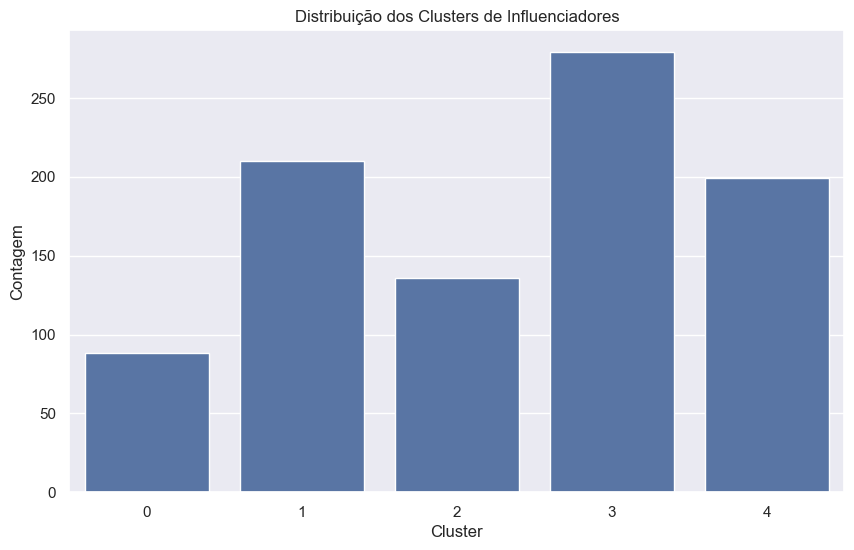

(cluster
 3    279
 1    210
 4    199
 2    136
 0     88
 Name: count, dtype: int64,
 [(0,
   categories
   0     368
   17     49
   42     45
   41     21
   36     18
   Name: count, dtype: int64),
  (1,
   categories
   0     970
   27    210
   41     31
   2      12
   17      6
   Name: count, dtype: int64),
  (2,
   categories
   0     633
   36     19
   21     18
   39     17
   20     16
   Name: count, dtype: int64),
  (3,
   categories
   0     926
   32    217
   -1     62
   27     49
   41     37
   Name: count, dtype: int64),
  (4,
   categories
   0     928
   41    123
   13     90
   39     10
   36      6
   Name: count, dtype: int64)])

In [31]:
# Transformar categorias específicas em formato adequado para clusterização
mlb = MultiLabelBinarizer()
categories_matrix = mlb.fit_transform(instagram_brasil_rebuild_df["categories"])

# Aplicar Algoritmo de Clusterização
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(categories_matrix)

# Adicionar os rótulos dos clusters ao dataframe original
instagram_brasil_rebuild_df["cluster"] = kmeans.labels_

# Analisar os clusters
cluster_counts = instagram_brasil_rebuild_df["cluster"].value_counts()

# Visualizar a distribuição dos clusters
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=instagram_brasil_rebuild_df, x="cluster", ax=ax)
ax.set_title("Distribuição dos Clusters de Influenciadores")
ax.set_xlabel("Cluster")
ax.set_ylabel("Contagem")
plt.show()

# Mostrar as categorias mais comuns em cada cluster
cluster_common_categories = []
for cluster in range(kmeans.n_clusters):
    cluster_data = instagram_brasil_rebuild_df[
        instagram_brasil_rebuild_df["cluster"] == cluster
    ]
    common_categories = cluster_data["categories"].explode().value_counts().head()
    cluster_common_categories.append((cluster, common_categories))

cluster_counts, cluster_common_categories

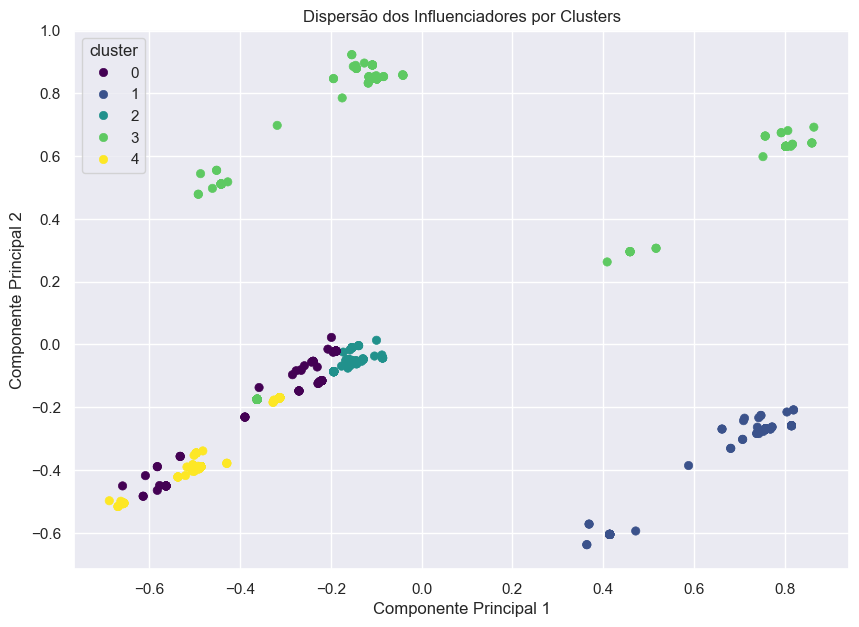

In [32]:
# Aplicar PCA para reduzir para 2 dimensões
pca = PCA(n_components=2)
categories_matrix_2d = pca.fit_transform(categories_matrix)

# Adicionar as componentes principais ao dataframe
instagram_brasil_rebuild_df["pca1"] = categories_matrix_2d[:, 0]
instagram_brasil_rebuild_df["pca2"] = categories_matrix_2d[:, 1]

# Plotar gráfico de dispersão colorindo os clusters
# Plotar gráfico de dispersão colorindo os clusters sem bordas para evitar o aviso
fig, ax = plt.subplots(figsize=(10, 7))
sns.scatterplot(
    data=instagram_brasil_rebuild_df,
    x="pca1",
    y="pca2",
    hue="cluster",
    palette="viridis",
    ax=ax,
    edgecolor=None,
)
ax.set_title("Dispersão dos Influenciadores por Clusters")
ax.set_xlabel("Componente Principal 1")
ax.set_ylabel("Componente Principal 2")
plt.show()

### Passo 1: Determinar o Número Ideal de Clusters

Uma maneira comum de determinar o número ideal de clusters é usar o método do cotovelo ("elbow method") ou o método da silhueta ("silhouette method").

### Passo 2: Normalização dos Dados

Certifique-se de que os dados estejam normalizados para que todas as características contribuam igualmente para a distância entre os pontos.

### Passo 3: Ajustar Parâmetros do Algoritmo

Ajustar parâmetros como `n_init`, `max_iter`, e `tol` no KMeans pode melhorar a estabilidade e a convergência do algoritmo.

Vou agora aplicar a clusterização usando 3 clusters, normalizar os dados e gerar um gráfico de dispersão colorido pelos clusters.


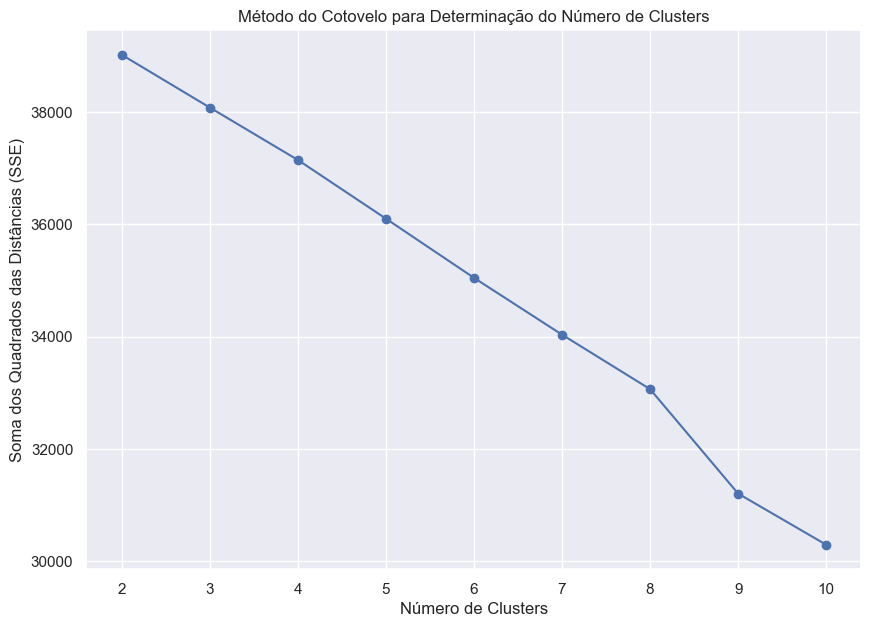

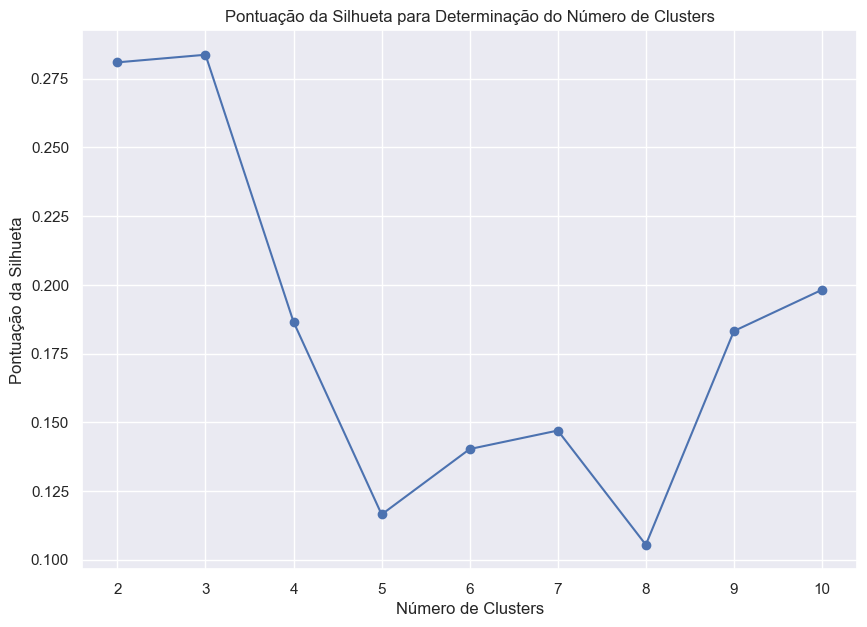

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Normalizar os dados
scaler = StandardScaler()
categories_matrix_scaled = scaler.fit_transform(categories_matrix)

# Determinar o número ideal de clusters usando o método do cotovelo
sse = []
silhouette_scores = []
k_range = range(2, 11)  # Testando de 2 a 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(categories_matrix_scaled)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(categories_matrix_scaled, kmeans.labels_))

# Plotar o gráfico do cotovelo
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(k_range, sse, marker="o")
ax.set_title("Método do Cotovelo para Determinação do Número de Clusters")
ax.set_xlabel("Número de Clusters")
ax.set_ylabel("Soma dos Quadrados das Distâncias (SSE)")
plt.show()

# Plotar o gráfico da silhueta
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(k_range, silhouette_scores, marker="o")
ax.set_title("Pontuação da Silhueta para Determinação do Número de Clusters")
ax.set_xlabel("Número de Clusters")
ax.set_ylabel("Pontuação da Silhueta")
plt.show()

### Análise dos Gráficos

#### Método do Cotovelo

O gráfico do método do cotovelo mostra a soma dos quadrados das distâncias (SSE) para diferentes números de clusters. Procuramos o ponto onde a redução no SSE começa a se estabilizar, formando um "cotovelo".

#### Pontuação da Silhueta

O gráfico da pontuação da silhueta mostra a qualidade dos clusters para diferentes números de clusters. Valores mais altos indicam melhores definições dos clusters.

### Determinação do Número Ideal de Clusters

- **Método do Cotovelo:** O cotovelo parece estar em torno de 3 a 5 clusters.
- **Pontuação da Silhueta:** A pontuação da silhueta é mais alta para 3 clusters, sugerindo que este pode ser um bom ponto para separar os dados em clusters bem definidos.

O gráfico acima mostra a dispersão dos influenciadores coloridos pelos clusters otimizados, utilizando 3 clusters conforme sugerido pela análise do método do cotovelo e da pontuação da silhueta.

### Observações

- **Clusters Distintos:** Cada cor representa um cluster diferente, facilitando a visualização dos agrupamentos de influenciadores.
- **Distribuição dos Clusters:** Os pontos estão agrupados em áreas distintas, indicando que os influenciadores dentro de cada cluster compartilham características similares.


# Abaixo Ainda está em processo de análise
#---------------------------------------------------------------------------------------------



In [34]:
# Formatação dos dados focando na categoria

df_valido["Categoria"] = df_valido["Categoria (Português)"]


df_valido.reset_index(inplace=True)


df_valido["ID"] = df_valido["index"]


df_valido = df_valido.drop(
    columns=["Categoria (Português)", "Categoria (Inglês)", "index"]
)[["Categoria", "Categoria Abrangente", "ID"]]


df_valido.head(10)

,Categoria,Categoria Abrangente,ID
0,Acessórios e Jóias,Beleza e Moda,0
1,Álcool,Comida e Bebida,1
2,Arte/Artistas,Arte/Artistas,2
3,Literatura e Jornalismo,Literatura e Jornalismo,4
4,Negócios e Carreiras,Negócios e Carreiras,5
5,Finanças e Economia,Finanças e Economia,6
6,Vestuário e Roupas,Beleza e Moda,7
7,Viagem,Outros,9
8,Relacionado a dispositivos móveis,Ciência e Tecnologia,10
9,Esportes aquáticos,Esportes,11


In [35]:
# Análise das categorias únicas

# Categorias únicas
cats_unicas = df_valido["Categoria"].unique()

# Número de categorias únicas
print(f"n_cats: {cats_unicas.size}")


cats_unicas

n_cats: 42


array(['Acessórios e Jóias', 'Álcool', 'Arte/Artistas',
       'Literatura e Jornalismo', 'Negócios e Carreiras',
       'Finanças e Economia', 'Vestuário e Roupas', 'Viagem',
       'Relacionado a dispositivos móveis', 'Esportes aquáticos',
       'Esportes de inverno', 'Esportes com uma bola',
       'Esportes Extremos e atividades ao Ar Livre',
       'Esportes de Corrida', 'Quadrinhos e Desenhos', 'Shows',
       'Carros e Motocicletas', 'Doces e Padaria', 'Beleza', 'Moda',
       'Saúde e Medicina', 'Fitness e Academia', 'Animais', 'Música',
       'Compras e Varejo', 'Ciência', 'Maquinaria e Tecnologias',
       'Treinadores e Tutores', 'Computadores e Aparelhos',
       'Comida e Culinária', 'Fotografia', 'Carreira de modelo',
       'Estilo de vida', 'Família', 'Luxo', 'Gerenciamento e Marketing',
       'Tabaco e Fumo', 'Conteúdo adulto', 'Gaming', 'Cripto', 'NFT',
       'Política'], dtype=object)

In [36]:
# Análise das categorias abrangentes únicas
cats_abr_unicas = df_valido["Categoria Abrangente"].unique()


print(f"n_cats_abr: {cats_abr_unicas.size}")


cats_abr_unicas

n_cats_abr: 24


array(['Beleza e Moda', 'Comida e Bebida', 'Arte/Artistas',
       'Literatura e Jornalismo', 'Negócios e Carreiras',
       'Finanças e Economia', 'Outros', 'Ciência e Tecnologia',
       'Esportes', 'Quadrinhos e Desenhos', 'Entretenimento e Mídia',
       'Carros e Motocicletas', 'Saúde e Bem-estar', 'Animais',
       'Compras e Varejo', 'Treinadores e Tutores', 'Fotografia',
       'Estilo de vida', 'Família', 'Luxo', 'Gerenciamento e Marketing',
       'Tabaco e Fumo', 'Conteúdo adulto', 'Política'], dtype=object)

In [37]:
# Relação entre categorias e categorias abrangentes
cats_abrag_rel = {}

# Para cada categoria abrangente única cria-se uma lista vazia
for cat_abr in cats_abr_unicas:

    cats_abrag_rel.update({cat_abr: []})

In [38]:
# Relacionamento entre categorias e categorias abrangentes
for cat in cats_unicas:

    if cat in df_valido["Categoria"].values:

        cat_abr = df_valido.loc[
            df_valido["Categoria"] == cat, "Categoria Abrangente"
        ].values[0]

        cats_abrag_rel[cat_abr].append(cat)

    else:

        print(f"Categoria '{cat}' não encontrada no DataFrame")

In [39]:
# exibição dos dados de usuários do Instagram
cats_abrag_rel

{'Beleza e Moda': ['Acessórios e Jóias',
  'Vestuário e Roupas',
  'Beleza',
  'Moda'],
 'Comida e Bebida': ['Álcool', 'Doces e Padaria', 'Comida e Culinária'],
 'Arte/Artistas': ['Arte/Artistas'],
 'Literatura e Jornalismo': ['Literatura e Jornalismo'],
 'Negócios e Carreiras': ['Negócios e Carreiras'],
 'Finanças e Economia': ['Finanças e Economia'],
 'Outros': ['Viagem', 'Carreira de modelo'],
 'Ciência e Tecnologia': ['Relacionado a dispositivos móveis',
  'Ciência',
  'Maquinaria e Tecnologias',
  'Computadores e Aparelhos',
  'Cripto',
  'NFT'],
 'Esportes': ['Esportes aquáticos',
  'Esportes de inverno',
  'Esportes com uma bola',
  'Esportes Extremos e atividades ao Ar Livre',
  'Esportes de Corrida'],
 'Quadrinhos e Desenhos': ['Quadrinhos e Desenhos'],
 'Entretenimento e Mídia': ['Shows', 'Música', 'Gaming'],
 'Carros e Motocicletas': ['Carros e Motocicletas'],
 'Saúde e Bem-estar': ['Saúde e Medicina', 'Fitness e Academia'],
 'Animais': ['Animais'],
 'Compras e Varejo': ['Co

In [40]:
# Carragamento dos dados de usuários do Instagram
df3 = pd.read_json("df_Instagram_Brasil.json").reset_index()


df3["username"] = df3["index"]


df3 = df3.drop(columns="index")


df3.head()

,fullname,is_verified,subscribers_count,engagement_avg,authentic_engagement,blogger_thematics,audience_geo_country_1_prc,username
0,Tupac Shakur,True,9022315,76549,55351,"[1027, 1041, 1036, 1032]",28.16,2pac
1,É A 30! 🤠🔥🍻,False,1380395,501440,390463,"[1017, 1036, 1027]",77.15,30sertanejo
2,YOUNGJAE,True,6436397,183496,146678,[1027],17.33,333cyj333
3,Gerard Piqué,True,22298880,228250,171242,[1013],16.43,3gerardpique
4,9GAG: Go Fun The World,True,56807517,42785,35513,[1036],9.68,9gag


In [41]:
# Análise da quantidade de usuários por categoria abrangente
cats_abrag_nchildrens = {"Categoria Abrangente": [], "n_childrens": []}


for i, j in cats_abrag_rel.items():

    cats_abrag_nchildrens["Categoria Abrangente"].append(i)

    cats_abrag_nchildrens["n_childrens"].append(len(j))


cats_abrag_nchildrens = pd.DataFrame(cats_abrag_nchildrens)


cats_abrag_nchildrens = cats_abrag_nchildrens.sort_values(
    by="n_childrens", ascending=False
)
cats_abrag_nchildrens

,Categoria Abrangente,n_childrens
7,Ciência e Tecnologia,6
8,Esportes,5
0,Beleza e Moda,4
1,Comida e Bebida,3
10,Entretenimento e Mídia,3
6,Outros,2
12,Saúde e Bem-estar,2
5,Finanças e Economia,1
16,Fotografia,1
22,Conteúdo adulto,1


In [42]:
# Função com a finalidade de exibir o gráfico
def mostrar_grafico(ax, x_label, y_label, title, fig_size=(10, 6), rotation=(0, 0)):

    style = "darkgrid"

    background_color = "#282c34"  # Fundo cinza escuro

    text_color = "#abb2bf"  # Cor do texto (cinza claro)

    axis_color = "#61afef"  # Cor dos eixos (azul claro)

    grid_color = "#3e4451"  # Cor das linhas da grade (cinza escuro)

    bar_color = "#6272a4"  # Cor das barras (azul/roxo escuro pastel)

    bar_edge_color = "#abb2bf"  # Cor das bordas das barras (cinza claro)

    # Definir o estilo do gráfico

    sns.set_theme(style=style, rc={"figure.figsize": fig_size})

    # Ajustar cores do gráfico

    ax.set_facecolor(background_color)  # Fundo do gráfico

    ax.figure.set_facecolor(background_color)  # Fundo da figura

    # Definir cor das letras para o tema "One Dark Pro Dark"
    ax.title.set_color(text_color)
    ax.xaxis.label.set_color(text_color)

    ax.yaxis.label.set_color(text_color)

    ax.tick_params(axis="x", colors=text_color, rotation=rotation[0], labelsize=8)

    ax.tick_params(axis="y", colors=text_color, rotation=rotation[1], labelsize=8)

    ax.spines["top"].set_color(grid_color)

    ax.spines["right"].set_color(grid_color)

    ax.spines["bottom"].set_color(grid_color)

    ax.spines["left"].set_color(grid_color)

    # Ajustar cor das barras para o tema

    for patch in ax.patches:

        patch.set_facecolor(bar_color)

        patch.set_edgecolor(bar_edge_color)

    # Ajustar a grade para ser exibida apenas no eixo x
    ax.grid(axis="x", color=grid_color)

    # Definir título e rótulos dos eixos

    ax.set_title(title, fontsize=16, color=text_color)

    ax.set_xlabel(x_label, fontsize=12, color=text_color)

    ax.set_ylabel(y_label, fontsize=12, color=text_color)

    plt.show()

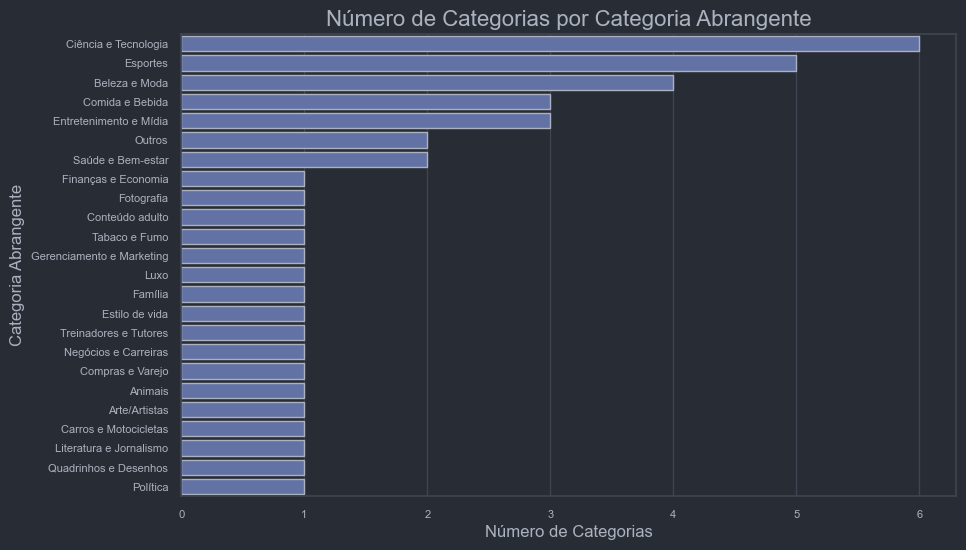

In [43]:
# Criar o gráfico de barras horizontal com o número de categorias por categoria abrangente
ax = sns.barplot(
    y="Categoria Abrangente",
    x="n_childrens",
    data=cats_abrag_nchildrens,
    orient="h",
)
mostrar_grafico(
    ax=ax,
    x_label="Número de Categorias",
    y_label="Categoria Abrangente",
    title="Número de Categorias por Categoria Abrangente",
    fig_size=(21, 9),
    rotation=(0, 0),
)

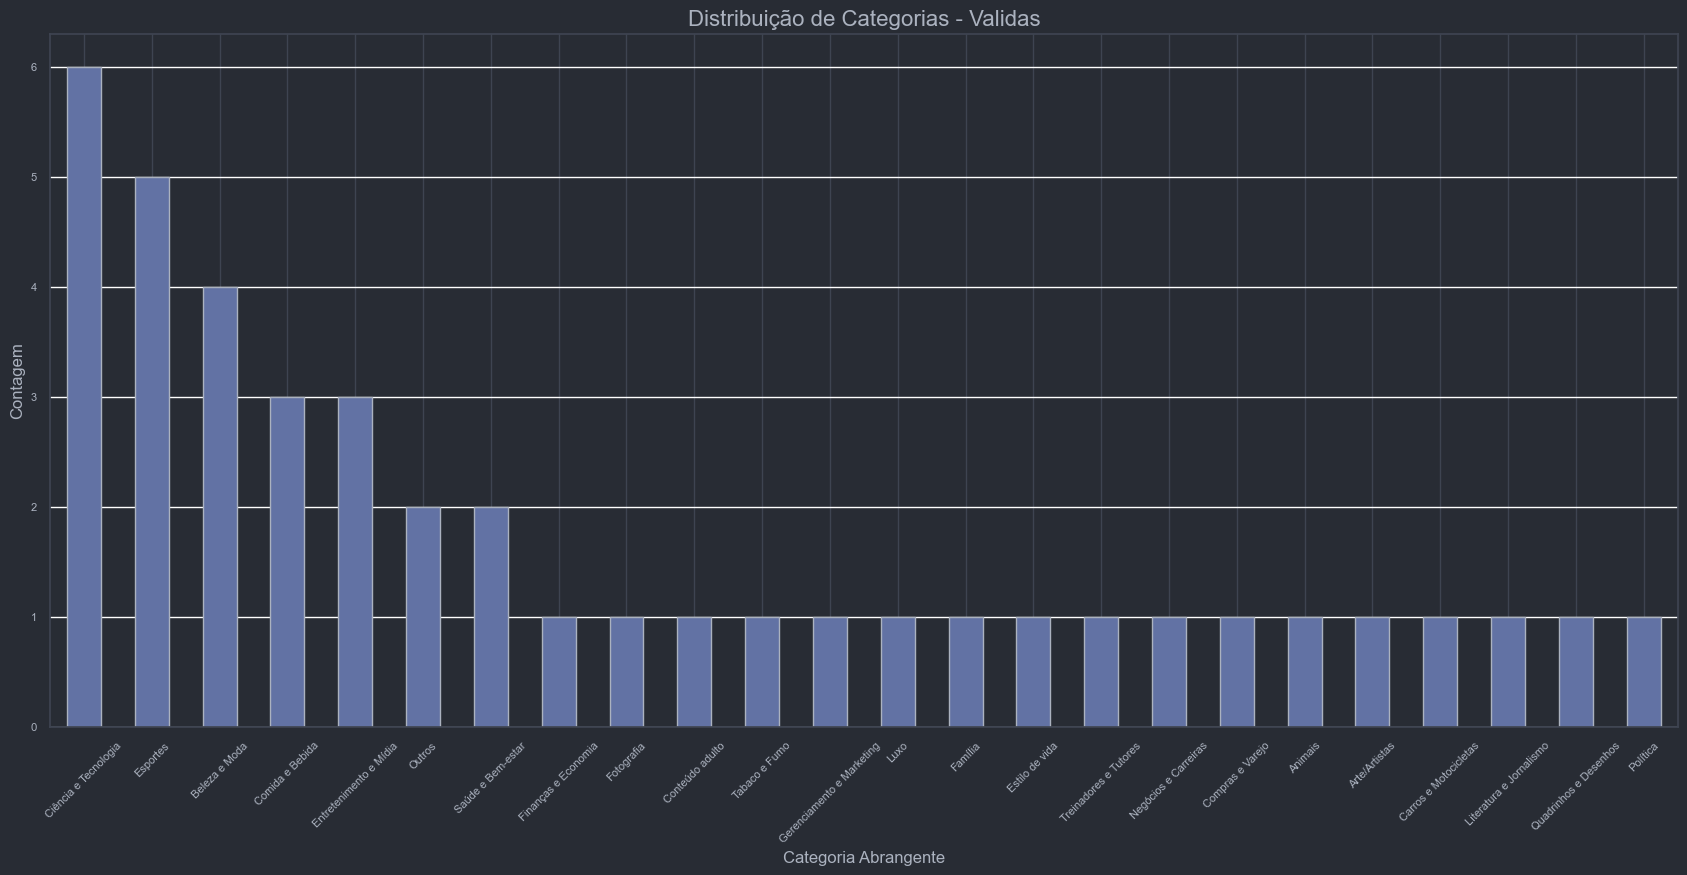

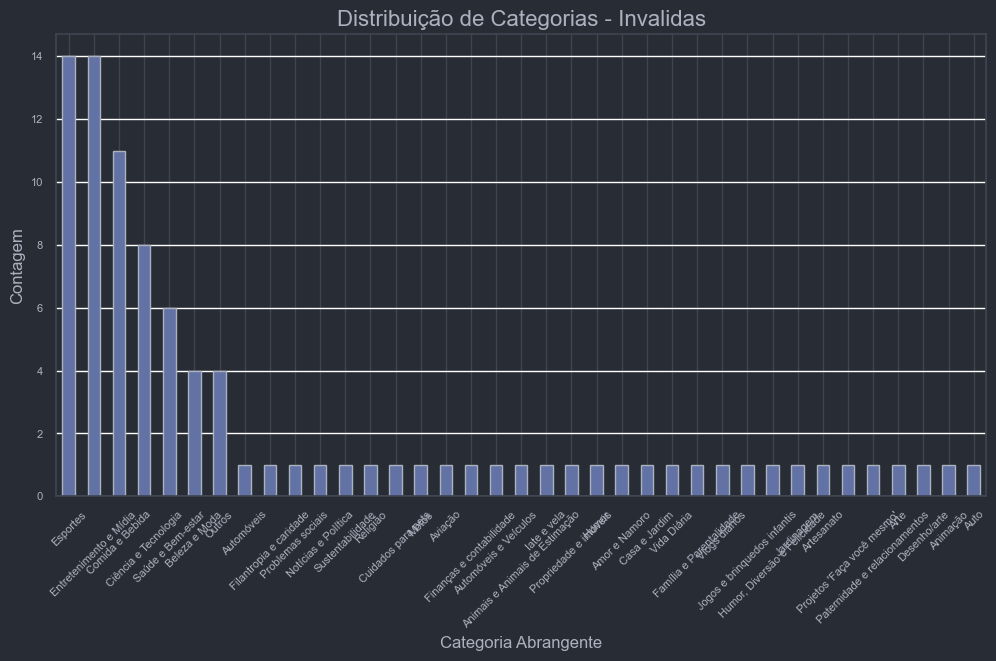

In [44]:
# Análise em desenvolvimento

# Contagem de categorias no DataFrame df_final_valido


category_count_valido = df_valido["Categoria Abrangente"].value_counts()


# Contagem de categorias no DataFrame df_final_faltante


category_count_faltante = df_faltante["Categoria Abrangente"].value_counts()


# Gráfico de barras para df_final_valido


ax1 = category_count_valido.plot(kind="bar")
mostrar_grafico(
    ax1,
    x_label="Categoria Abrangente",
    y_label="Contagem",
    title="Distribuição de Categorias - Validas",
    fig_size=(12, 6),
    rotation=(45, 0),
)


# Gráfico de barras para df_final_faltante


ax2 = category_count_faltante.plot(kind="bar")
mostrar_grafico(
    ax2,
    x_label="Categoria Abrangente",
    y_label="Contagem",
    title="Distribuição de Categorias - Invalidas",
    fig_size=(16, 6),
    rotation=(45, 0),
)